# Logistic Regression

- **Problem**

seaborn 라이브러리 안에 있는 'titanic' 데이터셋을 이용하여 생존했을지, 안했을지로 이진 분류로 예측할 수 있도록 학습시켜보고 점수로 평가해보자.


- **Sub-problem**

데이터 프레임을 이용하는 방법과 그 외에 필요한 것도 같이 공부해보자.

- **Solution**

'sex', 'age', 'first_class', 'second_class'를 입력 데이터로 받고, 'survived'를 라벨데이터로 사용한다.

- **Result**

훈련 데이터셋으로 80퍼센트, 테스트 데이터로 77퍼센트를 기록했다.

< 데이터 불러오기 >

In [1]:
import seaborn as sns

passengers = sns.load_dataset('titanic')

print(passengers.shape)
print(passengers)



(891, 15)
     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town 

< 데이터 전처리 과정 >

In [2]:
passengers['sex'] = passengers['sex'].map({'female':1,'male':0})
print(passengers['sex'])

passengers['age'].fillna(value = passengers['age'].mean(), inplace = True) # 결손 부분들 평균 값으로 채워줌
print(passengers['age'])
print(passengers.isnull().sum())


passengers['firstclass'] = passengers['pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['secondclass'] = passengers['pclass'].apply(lambda x: 1 if x == 2 else 0)

features = passengers[['sex', 'age', 'firstclass', 'secondclass']] # 문제를 설명하는 입력 데이터 X ([] -> 단일 열 선택 -> series 변한, [[]] -> 여러열 선택 -> DataFrame 변환 )
survivals = passengers['survived'] # 모델이 예측하고자 하는 결과 Y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


<ipython-input-2-5da8312a59b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  passengers['age'].fillna(value = passengers['age'].mean(), inplace = True) # 결손 부분들 평균 값으로 채워줌


< Train/ Test Set 분리하기 >

In [3]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survivals)

print(train_features.columns)
print(train_features.shape)

print(test_features.columns)
print(test_features.shape)

Index(['sex', 'age', 'firstclass', 'secondclass'], dtype='object')
(668, 4)
Index(['sex', 'age', 'firstclass', 'secondclass'], dtype='object')
(223, 4)


< 정규화가 필요한 이유 >

정규화는 다음과 같은 이유로 머신러닝과 딥러닝에서 중요한 역할을 합니다:

(1) 모델의 수렴 속도 개선
데이터의 스케일이 클 경우, 경사하강법에서 손실 함수가 느리게 줄어들거나 최적화가 어려울 수 있습니다.
정규화를 통해 손실 함수의 지형을 매끄럽게 만들어 수렴 속도를 높입니다.

(2) 특성의 중요도 균형
특성 간의 스케일 차이가 클 경우, 스케일이 큰 특성이 모델에 과도한 영향을 줄 수 있습니다.
정규화를 하면 모든 특성이 동일한 범위를 가지므로, 모델이 각 특성을 고르게 학습합니다.

(3) 수치 계산 안정성
매우 큰 값이나 작은 값이 계산 과정에서 오버플로우/언더플로우를 유발할 수 있습니다.
정규화를 통해 수치 계산을 안정화합니다.

* 표준편차는 데이터가 평균에서 얼마나 멀리 흩어져 있는지를 나타내는 지표입니다.

1) 평균에서 떨어진 거리 = x - u

2) 산포도를 계산하기 위해 제곱  (x - u)^2

3) 평균 = 분산(variance) 데이터 개수 N으로 나눔

4) 표준 편차는 분산의 제곱근

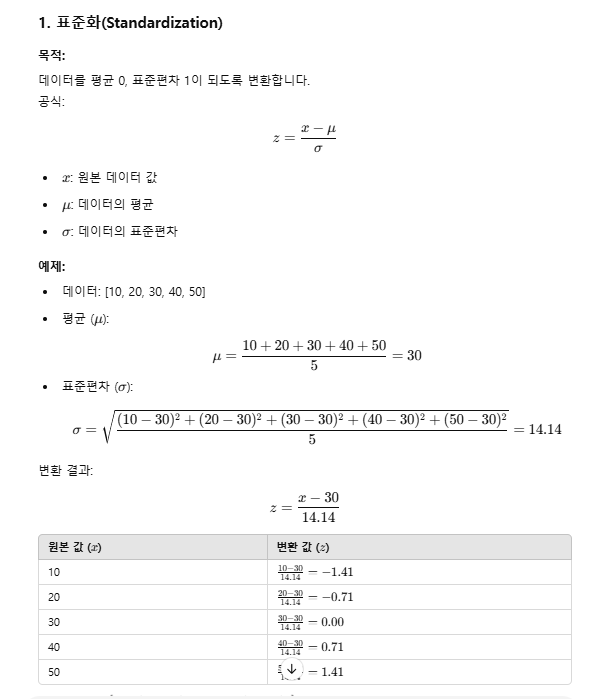

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_features = scaler.fit_transform(train_features)
# fit: 데이터를 기준으로 변환 규칙(평균과 표준편차)을 계산
# transform: 계산된 규칙을 사용하여 데이터를 변환
# 한번 fit하면 fit단계에서 scalar 객체에 평균과 표준편차가 저장된다.
# 그래서 Test에서는 transform만 사용하여,
# 이 지정된 값(훈련 데이터에서 계산한 것)만 변환한다.

test_features = scaler.transform(test_features)


만약 훈련 데이터와 테스트 데이터를 각각 따로 정규화한다면?

훈련 데이터와 테스트 데이터가 서로 다른 기준으로 정규화될 수 있습니다.

예: 훈련 데이터의 평균은 10이고, 테스트 데이터의 평균은 20일 수 있습니다.
그러면 훈련 데이터는 평균 0으로 변환되었지만, 테스트 데이터는 평균이 맞지 않을 수 있습니다.
모델의 일관성이 깨짐:

모델은 훈련 데이터의 기준을 기준으로 학습했으므로, 테스트 데이터도 같은 기준에 따라 변환해야 일관성을 유지합니다.

< Train Set >

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_features, train_labels)

print(model.score(train_features, train_labels))

0.8068862275449101


< Test Set >

In [6]:
print(model.score(test_features, test_labels))

0.7713004484304933


< DataFrame 관련 연습 >

출처: https://wikidocs.net/240528

In [7]:
import pandas as pd

data = [[1, 'Alice', 25],
        [2, 'Bob', 30],
        [3, 'Charlie', 35]
        ]
df = pd.DataFrame(data, columns = ['ID', 'Name', "Age"])

df['Name'] # Columns

df.iloc[0] # index

df.loc[2] # row name

df.at[1,'Name'] # specific value in a column and row

df['City'] = ['New York', 'Los Angeles', 'Chicago'] # adding column

new_row = {'ID': 4, 'Name':'David', 'Age': 40, 'City': 'San Francisco'} # 새로운 열 추가
df.loc[4] = new_row

filtered_df = df[(df['Age'] > 25) & (df['City'] == 'Chicago')]
filtered_df


,ID,Name,Age,City
2,3,Charlie,35,Chicago
